In [142]:
# Here we import all libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
import os
import torch
import random
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from collections import deque 
import sys
env = gym.make("CartPole-v0")

In [143]:
#Hyperparameters
episodes = 20000*5
eps = 1.0
learning_rate = 0.001
tot_rewards = []
tot_loss = []
decay_val = 0.0001
mem_size = 1000000
batch_size = 300
gamma = 0.99
max_steps = 200

In [144]:
class NeuralNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(NeuralNetwork, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(state_size, 300),
            nn.ReLU(),
            nn.Linear(300, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_size)
        )
    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [145]:
model = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)
opt = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
replay_buffer = deque(maxlen=mem_size)

In [146]:
#Testing code

# state = torch.tensor(env.reset(), dtype=torch.float32)
# print("state = ", state)
# out = model(state)
# print("out = ", out)

In [147]:
def compute_td_loss(batch_size):
    state, next_state, reward, done, action = zip(*random.sample(replay_buffer, batch_size))
    state = torch.stack(list(state), dim=0).reshape(batch_size, -1)

    next_state = torch.from_numpy(np.array(next_state).reshape(batch_size, -1)).type(torch.float32)
    
    reward = torch.from_numpy(np.array(reward))
    done = torch.from_numpy(np.array(done)).long()
    action = torch.from_numpy(np.array(action)).type(torch.int64)
    
    q_values = model(state)
    next_q_values = model(next_state)

    q_vals = q_values.gather(dim=-1, index=action.reshape(-1,1))
    max_next_q_values = torch.max(next_q_values,-1)[0].detach()

    loss = ((reward + gamma*max_next_q_values*(1-done) - q_vals.squeeze())**2).mean()

    opt.zero_grad()
    loss.backward()
    opt.step()
    return loss
    

Episode =  0  Epsilon =  1.0


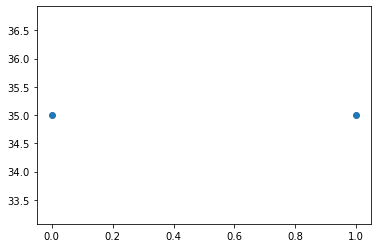

Episode =  1  Epsilon =  0.9965062922373764
Episode =  2  Epsilon =  0.9931240929477303
Episode =  3  Epsilon =  0.9899513336078503
Episode =  4  Epsilon =  0.9877759432483771
Episode =  5  Epsilon =  0.9864927329490045
Episode =  6  Epsilon =  0.9853097107748489
Episode =  7  Epsilon =  0.9843249427677173
Episode =  8  Epsilon =  0.9799056523467262
Episode =  9  Epsilon =  0.9764821483624831
Episode =  10  Epsilon =  0.9745312331753515
Episode =  11  Epsilon =  0.9730706051006852
Episode =  12  Epsilon =  0.9719036790155714
Episode =  13  Epsilon =  0.9669598349582635
Episode =  14  Epsilon =  0.964834967773834
Episode =  15  Epsilon =  0.9618487596955073
Episode =  16  Epsilon =  0.9596391600399697
Episode =  17  Epsilon =  0.9581050417104697
Episode =  18  Epsilon =  0.9560952326497377
Episode =  19  Epsilon =  0.9549486637769512
Episode =  20  Epsilon =  0.9526596493486864
Episode =  21  Epsilon =  0.9515172004973566
Episode =  22  Epsilon =  0.9497111244342705
Episode =  23  Epsil

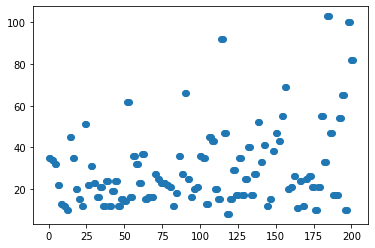

Episode =  101  Epsilon =  0.7410516033229295
Episode =  102  Epsilon =  0.7391274678194917
Episode =  103  Epsilon =  0.7365451724476025
Episode =  104  Epsilon =  0.7290709686300645
Episode =  105  Epsilon =  0.7208071659385873
Episode =  106  Epsilon =  0.7174274896999397
Episode =  107  Epsilon =  0.7162089599366694
Episode =  108  Epsilon =  0.7119247857566016
Episode =  109  Epsilon =  0.7108577524038187
Episode =  110  Epsilon =  0.7061111616227185
Episode =  111  Epsilon =  0.7040665076661337
Episode =  112  Epsilon =  0.6953904196775378
Episode =  113  Epsilon =  0.6885403607565952
Episode =  114  Epsilon =  0.6812126186071386
Episode =  115  Epsilon =  0.6746371276614749
Episode =  116  Epsilon =  0.6662570670502075
Episode =  117  Epsilon =  0.6640621520743571
Episode =  118  Epsilon =  0.6626691543632235
Episode =  119  Epsilon =  0.6561414217053818
Episode =  120  Epsilon =  0.6552235122962041
Episode =  121  Epsilon =  0.6535222288538053
Episode =  122  Epsilon =  0.64766

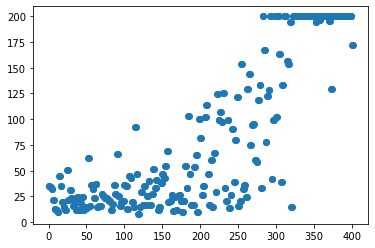

Episode =  201  Epsilon =  0.19229635804401612
Episode =  202  Epsilon =  0.18848882351263016
Episode =  203  Epsilon =  0.18475667948450258
Episode =  204  Epsilon =  0.1823522704640226
Episode =  205  Epsilon =  0.17970939935935173
Episode =  206  Epsilon =  0.17615109097205123
Episode =  207  Epsilon =  0.17266323832398459
Episode =  208  Epsilon =  0.16924444636709776
Episode =  209  Epsilon =  0.1658933476757719
Episode =  210  Epsilon =  0.1626086018998891
Episode =  211  Epsilon =  0.15938889522872846
Episode =  212  Epsilon =  0.15667098316975156
Episode =  213  Epsilon =  0.15356884340718516
Episode =  214  Epsilon =  0.15052812708699345
Episode =  215  Epsilon =  0.1475476180037304
Episode =  216  Epsilon =  0.1446261240332396
Episode =  217  Epsilon =  0.14176247665583572
Episode =  218  Epsilon =  0.13895553048892825
Episode =  219  Epsilon =  0.13620416282889924
Episode =  220  Epsilon =  0.13350727320205125
Episode =  221  Epsilon =  0.13086378292444717
Episode =  222  Ep

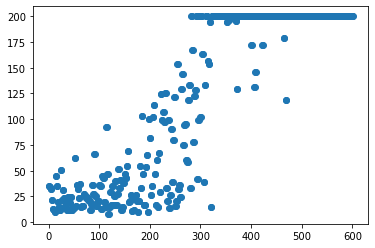

Episode =  301  Epsilon =  0.026693936491129416
Episode =  302  Epsilon =  0.026165387297569898
Episode =  303  Epsilon =  0.02564730356121654
Episode =  304  Epsilon =  0.025139478062389753
Episode =  305  Epsilon =  0.024641707684431483
Episode =  306  Epsilon =  0.024153793332463806
Episode =  307  Epsilon =  0.023675539853756384
Episode =  308  Epsilon =  0.023206755959670623
Episode =  309  Epsilon =  0.022747254149149247
Episode =  310  Epsilon =  0.022296850633720836
Episode =  311  Epsilon =  0.02185536526398951
Episode =  312  Epsilon =  0.021422621457579793
Episode =  313  Epsilon =  0.020998446128508434
Episode =  314  Epsilon =  0.020582669617954644
Episode =  315  Epsilon =  0.020175125626401103
Episode =  316  Epsilon =  0.019775651147118486
Episode =  317  Epsilon =  0.019384086400967327
Episode =  318  Epsilon =  0.019000274772490406
Episode =  319  Epsilon =  0.018624062747270884
Episode =  320  Epsilon =  0.01825529985053054
Episode =  321  Epsilon =  0.01789383858694

KeyboardInterrupt: 

In [148]:
for i in range(episodes):
    print("Episode = ", i, " Epsilon = ", eps)
    state = torch.tensor(env.reset(), dtype=torch.float32).unsqueeze(0)

    done = False
    steps = 0
    eps_rew = 0 
    eps_loss = 0
    while not done and steps<max_steps:
        if np.random.uniform(0,1)<eps:
            action = env.action_space.sample()
        else:
#             action = env.action_space.sample()
            action = np.argmax(model(state).detach().numpy())
                

        next_state, reward, done, info = env.step(action)
        replay_buffer.append((state, next_state, reward, done, action))
        if len(replay_buffer)>batch_size and steps%4==0:
            loss = compute_td_loss(batch_size)
            eps_loss += loss.detach().numpy()
        eps = eps/(1 + decay_val)
        eps_rew += reward 
        
        if done:
            tot_rewards.append(eps_rew)
            break
        
        state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
        steps += 1
    tot_rewards.append(eps_rew)
    tot_loss.append(eps_loss)
    
    if(i%100)==0:
        plt.scatter(np.arange(len(tot_rewards)), tot_rewards)
#         plt.scatter(np.arange(len(tot_loss)), tot_loss)
        plt.show()

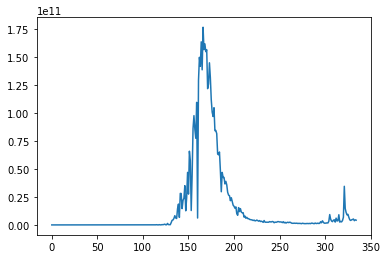

In [149]:
plt.plot(tot_loss)

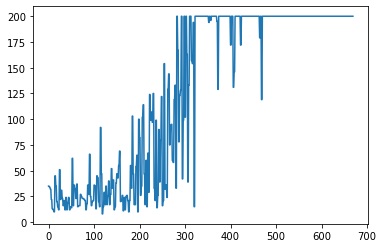

In [150]:
#Plot
plt.plot(tot_rewards)

In [ ]:
#Render the final environment
state, info = env.reset(seed=42, return_info=True)
import time
for i in range(1000):
    
    env.render()
    
    state = torch.tensor(state, dtype=torch.float32)
    action = np.argmax(model(state).detach().numpy())
    state, reward, done, info = env.step(action)

    if done:
        state, info = env.reset(return_info=True)
env.close()
